In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from scipy.stats import entropy
vectorizer = CountVectorizer()

# Part (a)
def load_data():
    # Load files
    real = open('clean_real.txt').readlines()
    fake = open('clean_fake.txt').readlines()
    X = real + fake
    
    # Create labels
    y = [True for i in range(len(real))] + [False for i in range(len(fake))]
    
    # Preprocess using vectorizer
    X = vectorizer.fit_transform(X)
    
    # Split total data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=311)

    # Split testing data into testing and validation sets
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=311)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
# Part (b)
def select_model(X_train, X_val, y_train, y_val):
    accuracies = {"gini": [], "entropy": [], "log_loss": []}
    max_validation_accuracy = 0
    best_tree = None
    
    for criterion in ["gini", "entropy", "log_loss"]:
        for max_depth in [2,3,5,6,7,9,10]:
            # Train the tree
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
            tree.fit(X_train, y_train)
            
            # Predict the y validation set and find the accuracy
            y_pred = tree.predict(X_val)
            accuracy = get_accuracy(y_val, y_pred)
            
            # Add the accuracy to accuracies for plotting
            accuracies[criterion].append(accuracy)
            
            # Print the criterion, max_depth, and accuracy
            print(f"Criterion: {criterion}, max_depth: {max_depth}, accuracy: {accuracy}")
            
            # Update the highest validation accuracy and corresponding tree
            if accuracy > max_validation_accuracy:
                max_validation_accuracy = accuracy
                best_tree = tree
    
    return accuracies, best_tree

# Helper function that gets the accuracy. Assume len(set1) == len(set2)
def get_accuracy(set1, set2):
    correct = 0
    for i in range(len(set1)):
        if set1[i] == set2[i]: correct += 1
    return correct / len(set1)

In [23]:
# Part (d)
def compute_information_gain(X, y, x_i):
    # Entropy of y
    h_y = entropy(true_false_distribution(y), base=2) # Passes in list of true and false counts
    
    # Gets lists of splitted data
    splitted_1 = [label for line, label in zip(X, y) if x_i in vectorizer.inverse_transform(line)[0]]
    splitted_2 = [label for line, label in zip(X, y) if x_i not in vectorizer.inverse_transform(line)[0]]
    
    # Entropy of y given x_i
    h_y_cond_x_i = (len(splitted_1) / len(y)) * entropy(true_false_distribution(splitted_1), base=2) 
    h_y_cond_x_i += (len(splitted_2) / len(y)) * entropy(true_false_distribution(splitted_2), base=2)
    
    return h_y - h_y_cond_x_i
    
# Helper function that gets the distribution of true and false values
def true_false_distribution(lst):
    return [lst.count(False) / len(lst), lst.count(True) / len(lst)]

Criterion: gini, max_depth: 2, accuracy: 0.6938775510204082
Criterion: gini, max_depth: 3, accuracy: 0.6918367346938775
Criterion: gini, max_depth: 5, accuracy: 0.6959183673469388
Criterion: gini, max_depth: 6, accuracy: 0.7020408163265306
Criterion: gini, max_depth: 7, accuracy: 0.7061224489795919
Criterion: gini, max_depth: 9, accuracy: 0.7183673469387755
Criterion: gini, max_depth: 10, accuracy: 0.7244897959183674
Criterion: entropy, max_depth: 2, accuracy: 0.6938775510204082
Criterion: entropy, max_depth: 3, accuracy: 0.6938775510204082
Criterion: entropy, max_depth: 5, accuracy: 0.6979591836734694
Criterion: entropy, max_depth: 6, accuracy: 0.7
Criterion: entropy, max_depth: 7, accuracy: 0.7061224489795919
Criterion: entropy, max_depth: 9, accuracy: 0.7163265306122449
Criterion: entropy, max_depth: 10, accuracy: 0.726530612244898
Criterion: log_loss, max_depth: 2, accuracy: 0.6938775510204082
Criterion: log_loss, max_depth: 3, accuracy: 0.6938775510204082
Criterion: log_loss, max_

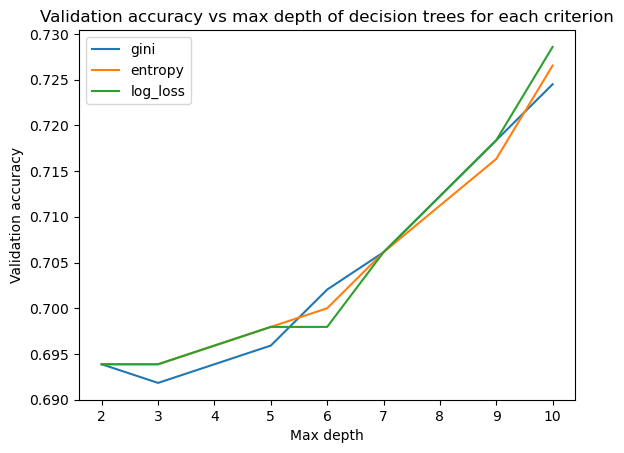

In [12]:
if __name__ == "__main__":
    # Part (a)
    X_train, X_val, X_test, y_train, y_val, y_test = load_data()
    
    # Part (b)
    accuracies, best_tree = select_model(X_train, X_val, y_train, y_val)
    
    # Get the test accuracy of the tree with the highest validation accuracy
    y_pred = best_tree.predict(X_test)
    test_accuracy = get_accuracy(y_test, y_pred)
    print(f"Test accuracy of tree with the highest validation accuracy: {test_accuracy}")
    
    # Plot
    max_depths = [2,3,5,6,7,9,10]
    criteria = ["gini", "entropy", "log_loss"]
    for i in range(len(criteria)):
        plt.plot(max_depths, accuracies[criteria[i]])
        plt.legend(criteria)
        plt.xlabel("Max depth")
        plt.ylabel("Validation accuracy")
        plt.title("Validation accuracy vs max depth of decision trees for each criterion")

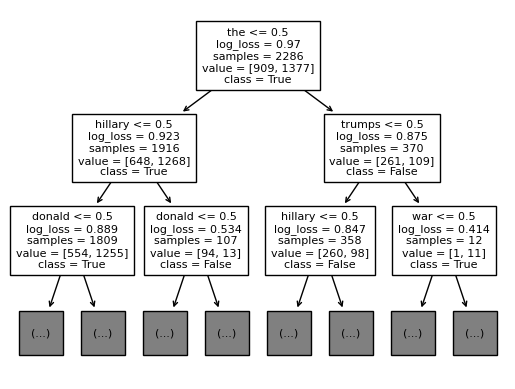

In [16]:
# Part (c)
_ = plot_tree(decision_tree=best_tree, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=["False", "True"], fontsize=8)

In [25]:
# Part (d)
words = ['the', 'us', 'trumps', 'hillary', 'donald']
for word in words:
    n = compute_information_gain(X_train, y_train, x_i=word)
    print(f"Information gain for {word}: {n}")

Information gain for the: 0.05431294336040304
Information gain for us: 0.023500563840293753
Information gain for trumps: 0.04280069136897102
Information gain for hillary: 0.04708470956770994
Information gain for donald: 0.046616794619072865
